<a href="https://colab.research.google.com/github/rsamodder/MRI-Tumor-Detection-System/blob/main/SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-gx5td119
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-gx5td119
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=865c63a1b5a96a118d87c821f51f9137e052a8cb265e55e60194739593cc0a6d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ope34rog/wheels/29/82/ff/04e2be9805a1cb48bec0b85b5a6da6b63f647645750a0e42d4
Successfully built segment_anything
--2026-02-24 16:31:07--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.182.62, 13.249.182.33, 13.249.182.81, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2
import torch

# 1. Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth").to(device)

# 2. Initialize the "Find Everything" tool
mask_generator = SamAutomaticMaskGenerator(sam)

# 3. Load your image
image = cv2.imread('/content/sample_data/c39db240-42ae-11f0-88e1-3f1b11853089.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 4. Generate masks (this may take 10-20 seconds)
masks = mask_generator.generate(image)
print(f"Found {len(masks)} objects!")

Found 34 objects!


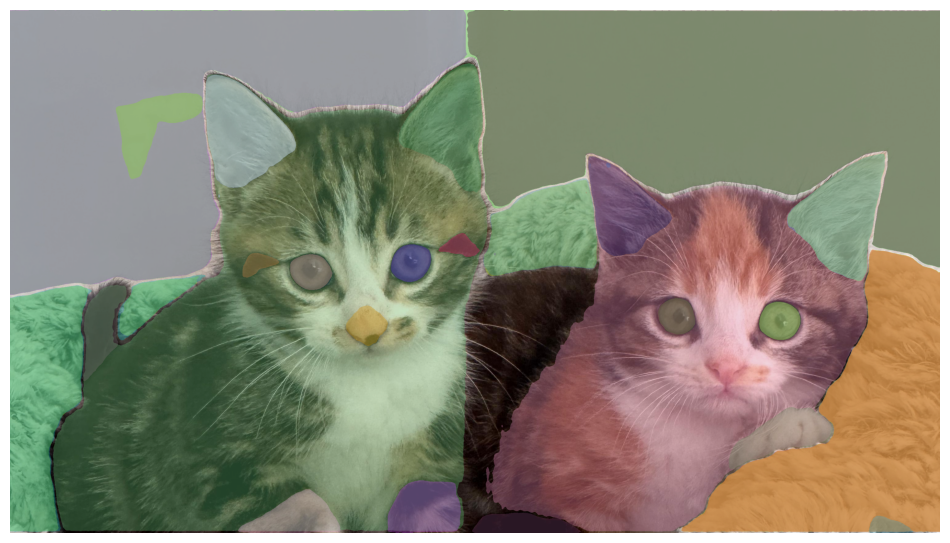

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_anns(anns):
    if len(anns) == 0:
        return
    # Sort masks by area so smaller masks are drawn on top of larger ones
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m * 0.35))) # 0.35 is the transparency/alpha

# Display the result
plt.figure(figsize=(12, 12))
plt.imshow(image) # This is your original image
show_anns(masks)  # This overlays the 80 objects
plt.axis('off')
plt.show()